
An interactive shell.

This file is designed to be launched as a PYTHONSTARTUP script.

Finished retrieving downloading data...
Size of Dataset:
Number of samples: 766
Number of features: 1850
Number of classes: 2
From 574 faces, extracting the top 200 eigenfaces
Finished randomization of samples and extraction of top eigenfaces...
Finished making training and test data...


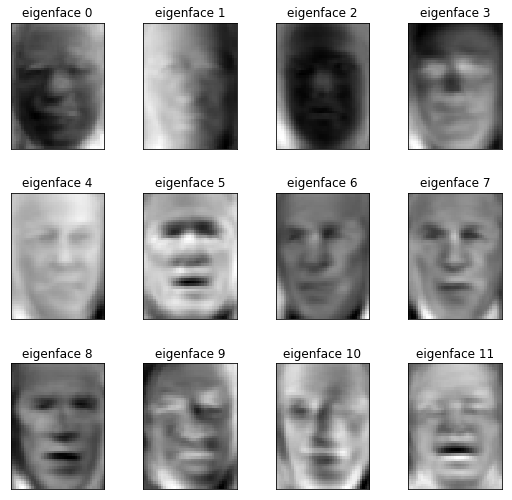

Score of prediction algorithm: 92.7083%
Finished the prediction...
Predicting people's names on the test set:
               precision    recall  f1-score   support

 Colin Powell       0.93      0.83      0.88        60
George W Bush       0.93      0.97      0.95       132

  avg / total       0.93      0.93      0.93       192

Confusion matrix:
[[ 50  10]
 [  4 128]]


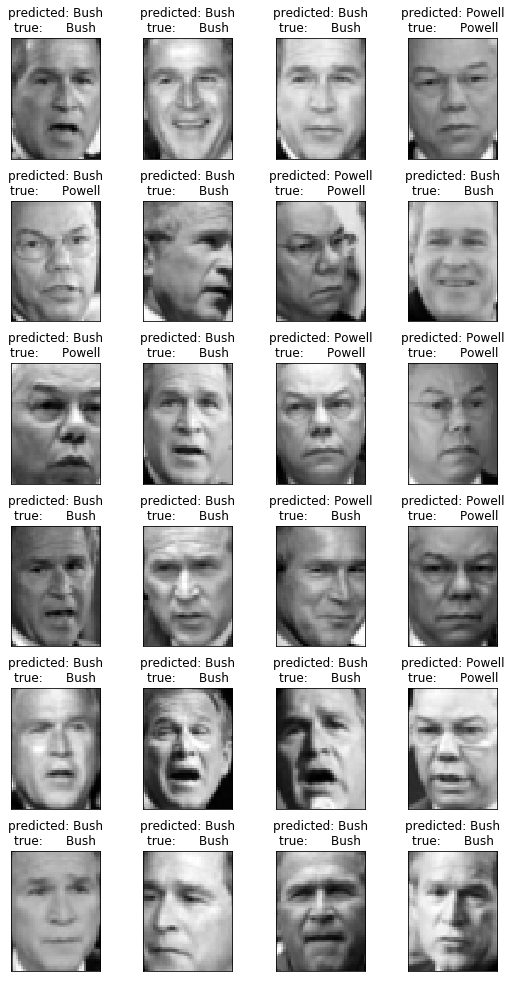

--- 2.95599985123 seconds ---


In [4]:
from __future__ import print_function

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
print(__doc__)

start_time = time.time()

##########################################################################
#loading built in library for faces around 10 min download
#note that even though we can’t narrow the dataset down to specific target_names we CAN set 
#the minumum faces to 200, which leaves only with 2 people - collin powell and george bush!
lfw = fetch_lfw_people(min_faces_per_person=200, resize=0.4)
print("Finished retrieving downloading data...")

# n_samples are the total amount of images, h = height, w = width
n_samples, h, w = lfw.images.shape

#extract features as our X
X = lfw.data
n_features = X.shape[1]

# tie the name of the person respect to the feature
y = lfw.target
target_names = lfw.target_names
n_classes = target_names.shape[0] #number of people (which should be 2)

print("Size of Dataset:")
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)
		
#########################################################
# split into a training and testing set: 4 even splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=47)
	
#########################################################
#Compute the PCA (eigenfaces) on the fgace dataset
n_components = 200

print("From %d faces, extracting the top %d eigenfaces"
	% (X_train.shape[0], n_components))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("Finished randomization of samples and extraction of top eigenfaces...")

eigenfaces = pca.components_.reshape((n_components, h, w))

#Must normalize and orthogonalize the eigenfaces for training data and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Finished making training and test data...")

#########################################################
#########################################################	
#A helper function in order to plot faces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

####################################################################
#Predicting with logistic regression
lreg = LogisticRegression() 
lreg.fit(X_train_pca, y_train)
predictions = lreg.predict(X_test_pca)
score = lreg.score(X_test_pca, y_test)
print("Score of prediction algorithm: %.4f%%" % (score*100))

#################################################
#fit using logistic regression
clf = lreg.fit(X_train_pca, y_train)
#This will now predict the names of people
y_pred = clf.predict(X_test_pca)
print("Finished the prediction...")
print("Predicting people's names on the test set:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

##################################################################
# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w, 6, 4)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

